# <div align= 'center'> <FONT COLOR='GREEN'>RASTGELE ORMAN

# <div align='center'> Odev 
    
**İkinci proje olan regresyon projesinde ve üçüncü proje olan sınıflandırma projesinde kullandığınız veri kümelerini tekrar kullanarak, Rastgele Orman ile regresyon ve sınıflandırma modelleri oluşturun ve bu modeller için en uygun parametre değerlerini belirleyin. En ideal parametreyi bulmak için daha önceki bölümde öğrendiğiniz çapraz doğrulama metodlarını kullanabilirsiniz.**

Rastgele Orman algoritması ise birden fazla makine öğrenme modelini içermektedir. Rastgele Orman gibi, güçlü modeller oluşturmak için birden fazla makine öğrenimi algoritmasının kullanıldığı metotlara ensemble metotlar denmektedir. 

# <font color= 'red'> 1. Ensemble Metotlar
    
Ensemble metotlar, aynı veri kümesi üzerinde farklı modellerin eğitilmesini sağlamaktadır. Her model kendi tahminini yapmakta ve tahminlerin birleşiminden bir meta-model oluşmaktadır. Böylece en başarılı tahmini yapan güçlü bir model oluşturulur.
Esemble Methodlar 3é ayrilir. 
* Stacking
* Bagging
* Boosting


## 1.1. Stacking
Aynı veri kümesinde farklı algoritmalar kullanarak bir meta-model oluşturma yöntemidir. Bu yöntem için sklearn kütüpanesinin ensemble modülünde yer alan **VotingClassifier** algoritmasını kullanabilirsiniz.

## 1.2. Boosting
Aynı veri kümesinde oluşturulan zayıf algoritmaların hatalarını dikkate alınarak, iterasyonlarla güçlü bir model oluşturma yöntemidir. Boosting metotlarını ileri ki derslerde çok daha detaylı inceleyeceğiz.

## 1.3. Bagging
Bagging "bootstrap aggregation" ifadesinin yerine kullanılmaktadır. Bootstrap'i ise bir veri kümesindeki değerleri kullanarak yeni bir örnek veri kümesi oluşturulması olarak tanımlayabiliriz.

Bagging yöntemi ile sınıflandırma ve regresyon modelleri oluşturmak için sklearn kütüpanesinin ensemble modülünde yer alan **BaggingClassifier** ve **BaggingRegressor** algoritmalarını kullanabilirsiniz.

**Stacking yönteminde aynı veri kümesi farklı algoritmalarda eğitilirken, bagging yöntemlerde de veri kümesinden oluşturulmuş birden fazla alt veri kümesi, aynı algoritma ile eğitilmektedir. Eğitilen bu farklı veri kümeleri ile nihai bir model oluşturulur. Bu model oluşturulurken sınıflandırma problemlerinde oylama yapılırken, regresyon problemlerinde ise ortalama alınmaktadır.**

# <font color='red'>2. Rastgele Orman
Ensemble metotlarına kısaca baktıktan sonra dersimizin asıl konusu olan Rastgele Orman'a gelebilriz. Rastgele Orman ana algoritma olarak Karar Ağacının kullanıldığı bir bagging metodur.

Rastgele orman, çok fazla koşulun olduğu durumlarda düşük varyans ile yüksek kesinlik sağladığı için veri bilimciler arasında oldukça popülerdir.

Karar ağaçları gibi, rastgele ormanlar da sınıflandırma ve regresyon problemleri için kullanılabilir.

*Rastgele orman oluşturuken ormanda kaç ağaç olacağı önemli bir kriterdir. Bunun için de n_estimators parametresini kullanacağız. Bu parametreyi 10 olarak belirlediğimizde birbirinden farklı 10 karar ağacı oluşturulacaktır.*

Sınıflandırma problemlerinde nihai tahmini yapabilmek için oylama yapıldığını belrtmiştik. Burada kullanılan oylama tekniği soft voting yöntemidir. Aslında oylamadan ziyade tahmin ihtimalinin ortalamasının alınmasıdır. Her ağaç sınıflar için bir tahmin ihtimali belirler ve ortalama tahmin ihtimali en yüksek olan sınıf seçilir.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('data/LifeExpectancy.csv', index_col=0)

In [3]:
df2 = pd.read_csv('data/wine.csv')
df2.type= df2.type.map({'white':1, 'red':0})

In [4]:
X_test, X_train, y_test, y_train = train_test_split(df2.drop('quality_range', axis=1), df2.quality_range, random_state=40, test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier


rastgele_orman = RandomForestClassifier(n_estimators=5, random_state=40)
rastgele_orman.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=40, verbose=0, warm_start=False)

Modelimizin doğruluk değerine bakalım.

In [6]:
from sklearn.metrics import accuracy_score


y_tahmin_ro = rastgele_orman.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.74


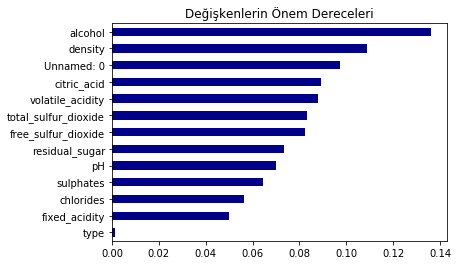

In [7]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_train.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkblue')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

Modelimiz en önemli değişken olarak bilet ücretini belirledi.

## 2.4. Rastgele Orman ile Regresyon

Rastgele Orman ile sınıflandırma yapmak için sklearn kütüphanesinin ensemble modülünde yeralan RandomForestRegressorı kullanmaktayız.

In [8]:
#Modelimizi eğitelim.

from sklearn.ensemble import RandomForestRegressor


rastgele_orman = RandomForestRegressor(n_estimators=5, random_state=40)
rastgele_orman.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
cv_score3 = cross_val_score(rastgele_orman,X_train,y_train,cv=3)
print('cv = 3 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cv_score3))

cv_score5 = cross_val_score(rastgele_orman,X_train,y_train,cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cv_score5))

cv_score8 = cross_val_score(rastgele_orman,X_train,y_train,cv=8)
print('cv = 8 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cv_score8))

cv_score10 = cross_val_score(rastgele_orman,X_train,y_train,cv=20)
print('cv = 10 ---> Ortalama çarpraz doğrulama skoru : ', np.mean(cv_score10))

cv = 3 ---> Ortalama çarpraz doğrulama skoru :  0.18031213831941126
cv = 5 ---> Ortalama çarpraz doğrulama skoru :  0.18548313953875484
cv = 8 ---> Ortalama çarpraz doğrulama skoru :  0.19042104220925476
cv = 10 ---> Ortalama çarpraz doğrulama skoru :  0.1858100277470207


In [11]:
from sklearn.model_selection import cross_validate

In [12]:
cv_score8 = cross_validate(rastgele_orman, X_train, y_train, cv=8)

In [13]:
#Modelimizi eğittik artık test edebiliriz.

from sklearn.metrics import mean_squared_error as MSE


y_tahmin = rastgele_orman.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Rastgele Orman): {:.2f}".format(rmse_test))


#Ilk deger olan 0.44 cv degeri ile secip model olusturmamla degismedi

RMSE değeri (Rastgele Orman): 0.44


In [14]:
from sklearn.tree import DecisionTreeRegressor
karar_agacı_reg = DecisionTreeRegressor(max_depth=4, random_state=40)
karar_agacı_reg.fit(X_train, y_train)

y_tahmin = karar_agacı_reg.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Karar Ağacı): {:.2f}".format(rmse_test))

#Ilk deger olan 0.44 cv degeri ile secip model olusturmamla degismedi

RMSE değeri (Karar Ağacı): 0.44


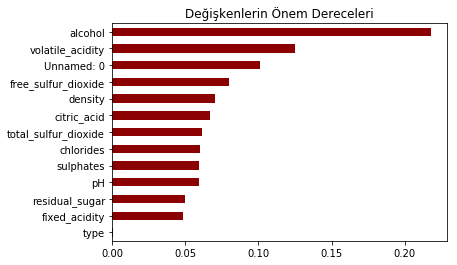

In [15]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_train.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkred')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()

##### Life Expectancy Data ile

In [16]:
X_test, X_train, y_test, y_train = train_test_split(df1.drop('Life_Expectancy', axis=1), df1.Life_Expectancy, random_state=40, test_size=0.2)

In [17]:
rastgele_orman = RandomForestRegressor(n_estimators=5, random_state=40)
rastgele_orman.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [18]:
y_tahmin = rastgele_orman.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Rastgele Orman): {:.2f}".format(rmse_test))

RMSE değeri (Rastgele Orman): 2.84


In [19]:
karar_agacı_reg = DecisionTreeRegressor(max_depth=4, random_state=40)
karar_agacı_reg.fit(X_train, y_train)

y_tahmin = karar_agacı_reg.predict(X_test)
rmse_test = MSE(y_test, y_tahmin)**(1/2)
print("RMSE değeri (Karar Ağacı): {:.2f}".format(rmse_test))

RMSE değeri (Karar Ağacı): 3.58


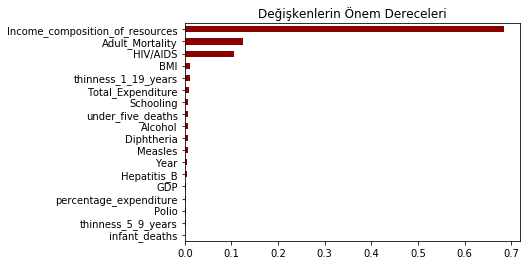

In [20]:
önem_dereceleri = pd.Series(data=rastgele_orman.feature_importances_,
                        index= X_train.columns)

önem_dereceleri_sıralı = önem_dereceleri.sort_values()

önem_dereceleri_sıralı.plot(kind='barh', color='darkred')
plt.title('Değişkenlerin Önem Dereceleri')
plt.show()